## Working with MNIST Dataset using ANN

In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [8]:
mnist = tf.keras.datasets.fashion_mnist

In [28]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [29]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [30]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [32]:
np.max(X_train), np.min(X_train), np.mean(X_train)

(255, 0, 72.94035223214286)

In [33]:
# https://github.com/zalandoresearch/fashion-mnist

class_names = ['t-shirt','trouser','pullover','dress','coat', 'sandal','shirt','sneaker','bag','ankle boot']

## Data Exploration

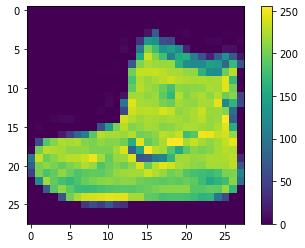

In [34]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [35]:
y_train[0], class_names[y_train[0]]

(9, 'ankle boot')

In [36]:
# Perform Normalization of the data
X_train = X_train / 255
X_test = X_test / 255

In [37]:
np.max(X_train), np.max(X_test)

(1.0, 1.0)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense

In [39]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model.compile(
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    optimizer='adam',
    metrics = ['accuracy']
)

In [43]:
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3261 - accuracy: 0.8797
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3002 - accuracy: 0.8902
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2894 - accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2786 - accuracy: 0.8971
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2710 - accuracy: 0.9007
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2615 - accuracy: 0.9043
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9057
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2481 - accuracy: 0.9099
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2403 - accuracy: 0.9120
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8789


(0.3497646450996399, 0.8788999915122986)

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
# y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [48]:
accuracy_score(y_test, y_pred)

0.8789

In [49]:
# ouput of predict method
y_pred = model.predict(X_test)
y_pred

array([[1.2578955e-07, 5.0815570e-14, 5.7023641e-10, ..., 3.6146401e-03,
        3.8952702e-08, 9.8470414e-01],
       [1.7042466e-06, 5.3028415e-13, 9.9808526e-01, ..., 6.0730004e-18,
        2.4648490e-11, 1.5816318e-21],
       [2.9869025e-06, 9.9999690e-01, 2.2239108e-08, ..., 4.0617207e-18,
        1.0246117e-11, 1.4882293e-16],
       ...,
       [1.8135426e-06, 4.7113832e-12, 1.6053281e-06, ..., 1.0782087e-09,
        9.9992156e-01, 1.3024148e-13],
       [7.6237552e-07, 9.9996543e-01, 2.4275425e-06, ..., 1.0097945e-14,
        1.0311193e-08, 2.8819198e-14],
       [7.9379186e-07, 1.0060488e-11, 1.8316979e-07, ..., 4.5227716e-04,
        4.8106900e-05, 7.2253074e-06]], dtype=float32)

In [52]:
# y_test is categorical data
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [51]:
# y_test is categorical data
y_pred[0]

array([1.2578955e-07, 5.0815570e-14, 5.7023641e-10, 2.0858161e-11,
       2.2422231e-11, 1.1678656e-02, 2.3588773e-06, 3.6146401e-03,
       3.8952702e-08, 9.8470414e-01], dtype=float32)

In [54]:
np.argmax(y_pred[0])

9

In [55]:
np.argmax(y_pred[1])

2